tahmin yürütme yöntemleri:
- en küçük kareler toplamı(least squares extimation method)
- maksimum olabilirlik fonksiyon yöntemi(maximum likelihood estimation - MLE method)

regresyon türleri:
- simple lineer regression
- multiple lineer regresion
- logistic regression

dummy variable: regresyon modelinde kategorik değişkenler bulunduğunda kullanılır.

In [121]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [61]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [62]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


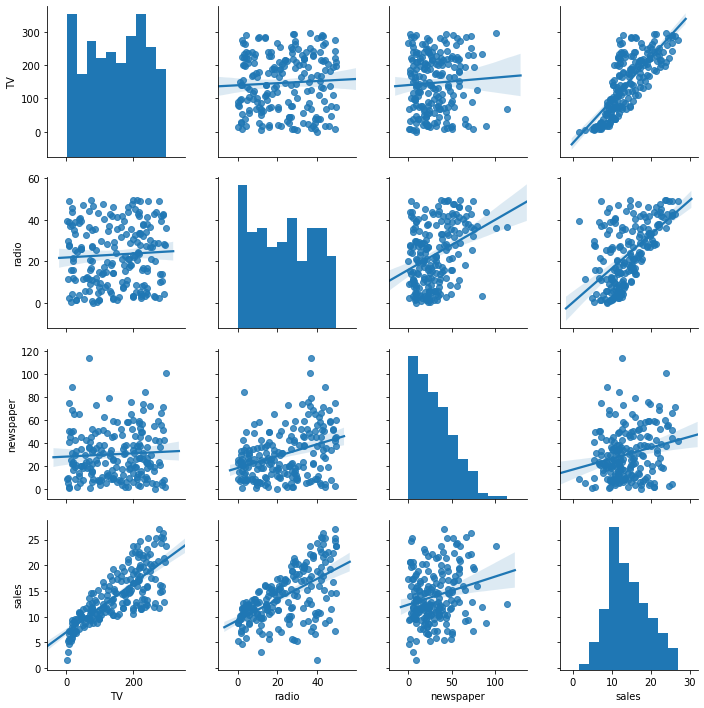

In [63]:
sns.pairplot(df, kind = "reg")

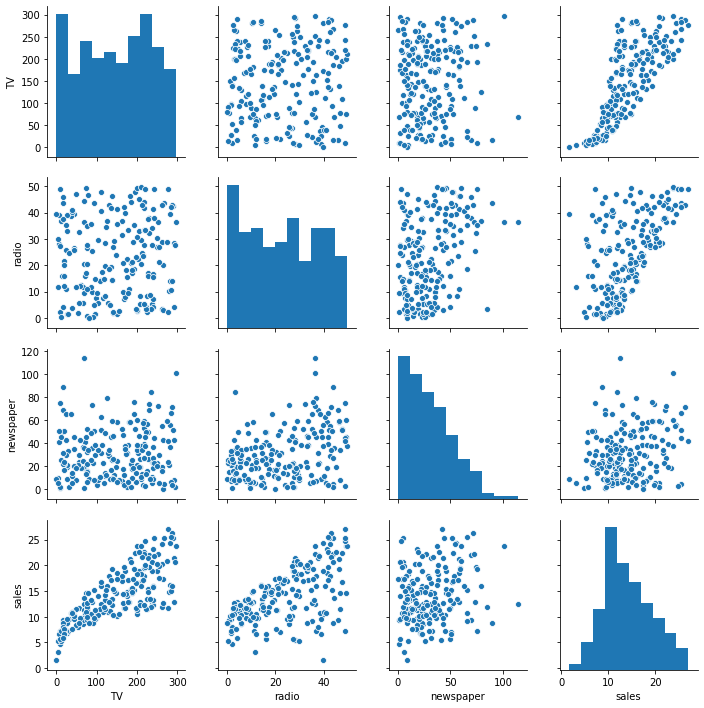

In [64]:
sns.pairplot(df, kind = "scatter")

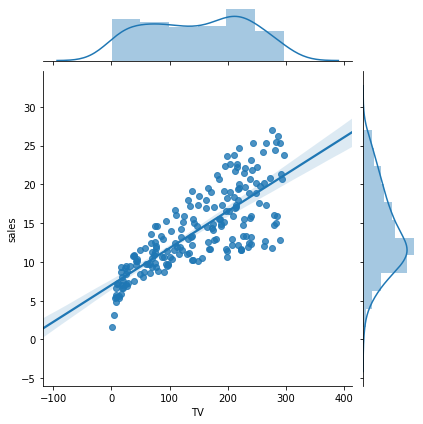

In [65]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

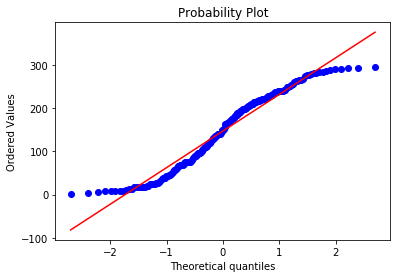

In [66]:
stats.probplot(df["TV"], dist = "norm", plot = pylab)
pylab.show()

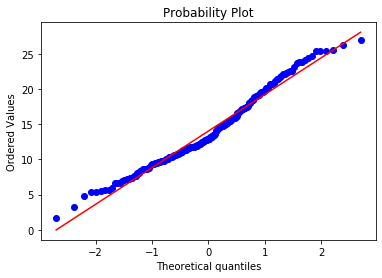

In [67]:
stats.probplot(df["sales"], dist = "norm", plot = pylab)
pylab.show()

In [68]:
x = df[["TV"]]
x[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [69]:
x = sm.add_constant(x)
x[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [70]:
y = df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [71]:
lm = sm.OLS(y, x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        15:11:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()
model.params
model.summary().tables[1]
model.conf_int()
model.f_pvalue
print("f_pvalue : ", "%.4f" % model.f_pvalue)
print("fvalue : ", "%.2f" % model.fvalue)
print("tvalue : ", "%.2f" % model.tvalues[:1])

f_pvalue :  0.0000
fvalue :  312.14
tvalue :  15.36


In [73]:
model.rsquared_adj
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [74]:
y[:5]
print("sales = "+ str("%.2f" % model.params[0]) + "+TV" + "*" + str("%.2f" % model.params[1]))

sales = 7.03+TV*0.05


Text(0.5, 0, 'tv harcamaları')

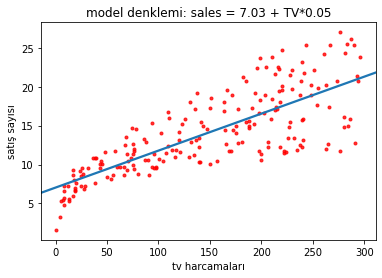

In [79]:
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {"color": "r", "s":9})
g.set_title("model denklemi: sales = 7.03 + TV*0.05")
g.set_ylabel("satış sayısı")
g.set_xlabel("tv harcamaları")

In [92]:
x = df[["TV"]]
y = df["sales"]
reg = lr()
model = reg.fit(x, y)
model.intercept_

7.032593549127693

In [87]:
model.coef_

array([0.04753664])

In [88]:
model.score(x,y)

0.611875050850071

In [89]:
model.predict(x)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [90]:
model.predict([[30]])

array([8.45869276])

In [94]:
yeni_veri = [[5], [90], [200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [98]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        15:30:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [102]:
rems = np.sqrt(mse)
rems

3.2423221486546887

In [103]:
reg.predict(x)[:10]
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [104]:
k_t = pd.DataFrame({"gercek_y": y[:10], "tahmin_y": reg.predict(x)[:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [106]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [110]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [111]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [117]:
mn = np.mean(k_t["hata_kare"])
mn

9.290350329638105

In [118]:
np.sqrt(mn)

3.048007599996776

In [119]:
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

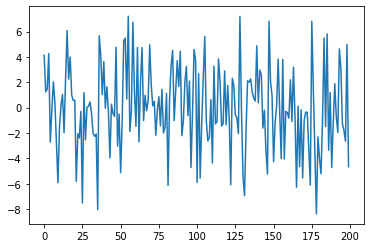

In [122]:
plt.plot(model.resid)